## get_clf_eval 함수

In [3]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    # ROC-AUC print 추가
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

In [2]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

datasets = load_breast_cancer()
ftr = datasets.data
target = datasets.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state = 37)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set = evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.579158
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.523182
[3]	valid_0's binary_logloss: 0.480855
[4]	valid_0's binary_logloss: 0.439102
[5]	valid_0's binary_logloss: 0.405912
[6]	valid_0's binary_logloss: 0.378326
[7]	valid_0's binary_logloss: 0.352459
[8]	valid_0's binary_logloss: 0.332062
[9]	valid_0's binary_logloss: 0.313029
[10]	valid_0's binary_logloss: 0.295531
[11]	valid_0's binary_logloss: 0.282997
[12]	valid_0's binary_logloss: 0.270307
[13]	valid_0's binary_logloss: 0.259593
[14]	valid_0's binary_logloss: 0.249241
[15]	valid_0's binary_logloss: 0.241565
[16]	valid_0's binary_logloss: 0.233833
[17]	valid_0's binary_logloss: 0.227687
[18]	valid_0's binary_logloss: 0.223566
[19]	valid_0's binary_logloss: 0.217868
[20]	valid_0's binary_logloss: 0.210289
[21]	valid_0's binary_logloss: 0.208071
[22]	valid_0's binary_logloss: 0.201756
[23]	valid_0's binary_logloss: 0.194753
[24]	valid_0's binary_loglo

In [4]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[38  2]
 [ 3 71]]
정확도: 0.9561, 정밀도: 0.9726, 재현율: 0.9595, F1: 0.9660, AUC:0.9845


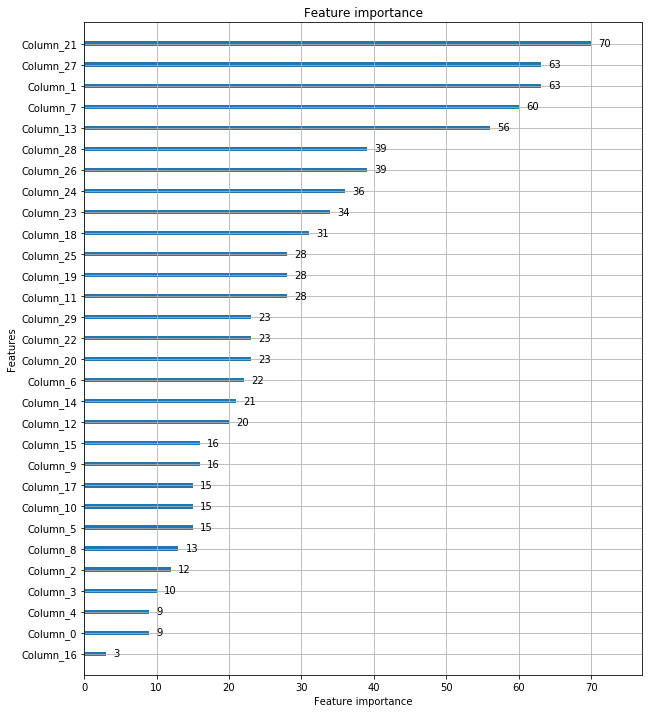

In [7]:
# plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax=ax)